In [ ]:
import geopandas as gpd # Geopandas to read Geographic data such as Shape and GeoJSON

import matplotlib.pyplot as plt
import json
import pandas as pd # Pandas to process tabular data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Distribution of Bussiness in Massachusetts
The first dataset in this example is the distribution of Businesses in the State of Massachusetts.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/umassdgithub/Sample_Data/main/MA_businesses.csv",skiprows=1)

In [ ]:
df.head(3)

,Geographic identifier code,Geographic Area Name,Geo Footnote,2017 NAICS code,2017 NAICS Footnote,Meaning of NAICS Code,Legal form of organization code,Meaning of Legal form of organization code,Employment size of establishments code,Meaning of Employment size of establishments code,Year,Number of establishments,Flag for number of establishments,"Annual payroll ($1,000)",Flag for annual payroll,Noise range for annual payroll,Flag for Noise range for annual payroll,"First-quarter payroll ($1,000)",Flag for first-quarter payroll,Noise range for first-quarter payroll,Flag for Noise range for first-quarter payroll,Number of employees,Flag for number of employees,Noise range for number of employees,Flag for Noise range for number of employees,Unnamed: 25
0,0500000US25001,"Barnstable County, Massachusetts",NaN,00,NaN,Total for all sectors,1,All establishments,1,All establishments,2021,8655,NaN,4092999,NaN,G,G,833018,NaN,G,G,70708,NaN,G,G,NaN
1,0500000US25001,"Barnstable County, Massachusetts",NaN,00,NaN,Total for all sectors,1,All establishments,210,Establishments with less than 5 employees,2021,5512,NaN,N,N,N,N,N,N,N,N,N,N,N,N,NaN
2,0500000US25001,"Barnstable County, Massachusetts",NaN,00,NaN,Total for all sectors,1,All establishments,220,Establishments with 5 to 9 employees,2021,1579,NaN,N,N,N,N,N,N,N,N,N,N,N,N,NaN


## Exploring data
## Example
All establishments in "Bristol County" with "NAICS Code" = "Manufacturing"


In [ ]:
# Employment size of establishments code = 1: establishments
df[(df['Geographic Area Name'].str.contains('Bristol'))
   & (df['Meaning of NAICS Code']=='Educational services')
   & (df['Employment size of establishments code']==1) ]

,Geographic identifier code,Geographic Area Name,Geo Footnote,2017 NAICS code,2017 NAICS Footnote,Meaning of NAICS Code,Legal form of organization code,Meaning of Legal form of organization code,Employment size of establishments code,Meaning of Employment size of establishments code,Year,Number of establishments,Flag for number of establishments,"Annual payroll ($1,000)",Flag for annual payroll,Noise range for annual payroll,Flag for Noise range for annual payroll,"First-quarter payroll ($1,000)",Flag for first-quarter payroll,Noise range for first-quarter payroll,Flag for Noise range for first-quarter payroll,Number of employees,Flag for number of employees,Noise range for number of employees,Flag for Noise range for number of employees,Unnamed: 25
330,0500000US25005,"Bristol County, Massachusetts",NaN,61,NaN,Educational services,1,All establishments,1,All establishments,2021,149,NaN,150382,NaN,G,G,34293,NaN,G,G,4258,NaN,G,G,NaN


In [ ]:
# Make GeoID as standard in State format:
df['GEOID_'] = df['Geographic identifier code'].apply(lambda x: x.split("US")[1])

## Merging GeoSpatial Data with Tabular data

In [ ]:
## Load the Counties Shape file downloaded from US Census Portal

In [ ]:
# Read the shapefile into a GeoDataFrame
us_counties_shapefile_path = "https://github.com/umassdgithub/Sample_Data/raw/main/shape/us_county2022.zip"
gdf_us_counties = gpd.read_file(us_counties_shapefile_path)
gdf_MA = gdf_us_counties[gdf_us_counties['STATEFP']=='25'].copy()

Text(0.5, 1.0, 'Massachusetts Counties')

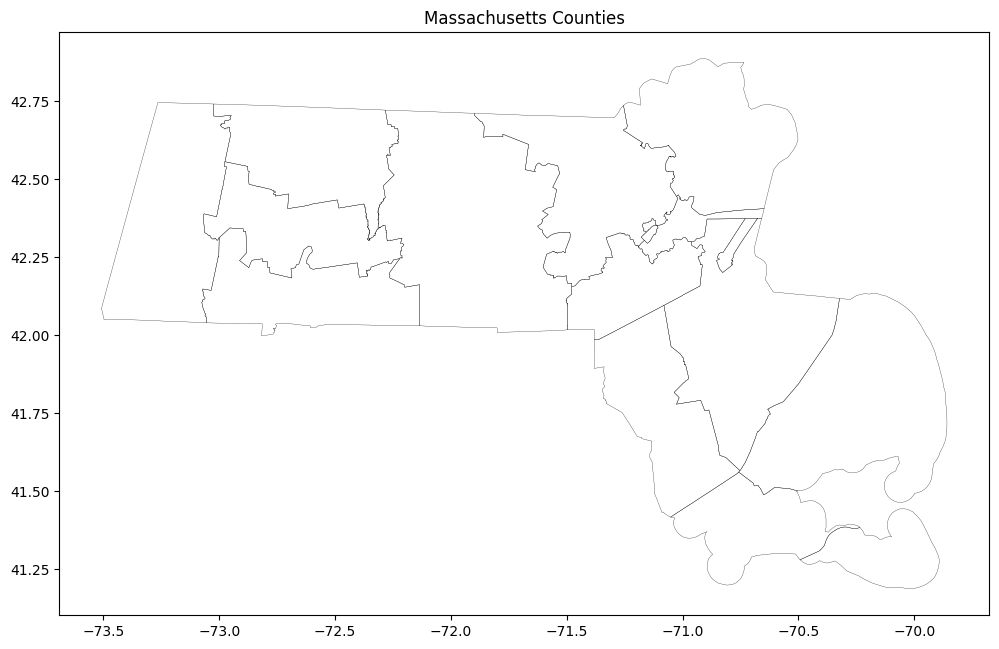

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
gdf_MA.plot(ax=ax, color='none', linewidth=0.2)
ax.set_title("Massachusetts Counties")

In [ ]:
## Merging the two datasets using merge function
NACIS_Business_Name = 'Educational services'
df_Business = df[(df['Meaning of NAICS Code']==NACIS_Business_Name)
               & (df['Employment size of establishments code']==1) ]


In [ ]:
dgf_merged = gdf_MA.merge(df_Business, left_on='GEOID', right_on='GEOID_', how='inner').copy()

In [ ]:
dgf_merged.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geographic identifier code,Geographic Area Name,Geo Footnote,2017 NAICS code,2017 NAICS Footnote,Meaning of NAICS Code,Legal form of organization code,Meaning of Legal form of organization code,Employment size of establishments code,Meaning of Employment size of establishments code,Year,Number of establishments,Flag for number of establishments,"Annual payroll ($1,000)",Flag for annual payroll,Noise range for annual payroll,Flag for Noise range for annual payroll,"First-quarter payroll ($1,000)",Flag for first-quarter payroll,Noise range for first-quarter payroll,Flag for Noise range for first-quarter payroll,Number of employees,Flag for number of employees,Noise range for number of employees,Flag for Noise range for number of employees,Unnamed: 25,GEOID_
0,25,015,00606934,25015,Hampshire,Hampshire County,06,H4,G4020,NaN,NaN,NaN,N,1365533874,46625893,+42.3394593,-072.6636936,"POLYGON ((-72.33597 42.22016, -72.33602 42.219...",0500000US25015,"Hampshire County, Massachusetts",NaN,61,NaN,Educational services,1,All establishments,1,All establishments,2021,115,NaN,342009,NaN,G,G,78818,NaN,G,G,8168,NaN,G,G,NaN,25015
1,25,025,00606939,25025,Suffolk,Suffolk County,06,H4,G4020,NaN,NaN,NaN,N,150875412,160499085,+42.3385513,-071.0182530,"POLYGON ((-71.03301 42.41461, -71.03282 42.415...",0500000US25025,"Suffolk County, Massachusetts",NaN,61,NaN,Educational services,1,All establishments,1,All establishments,2021,434,NaN,2679156,NaN,H,H,656212,NaN,H,H,54931,NaN,H,H,NaN,25025


Text(0.5, 1.0, 'People in Educational services')

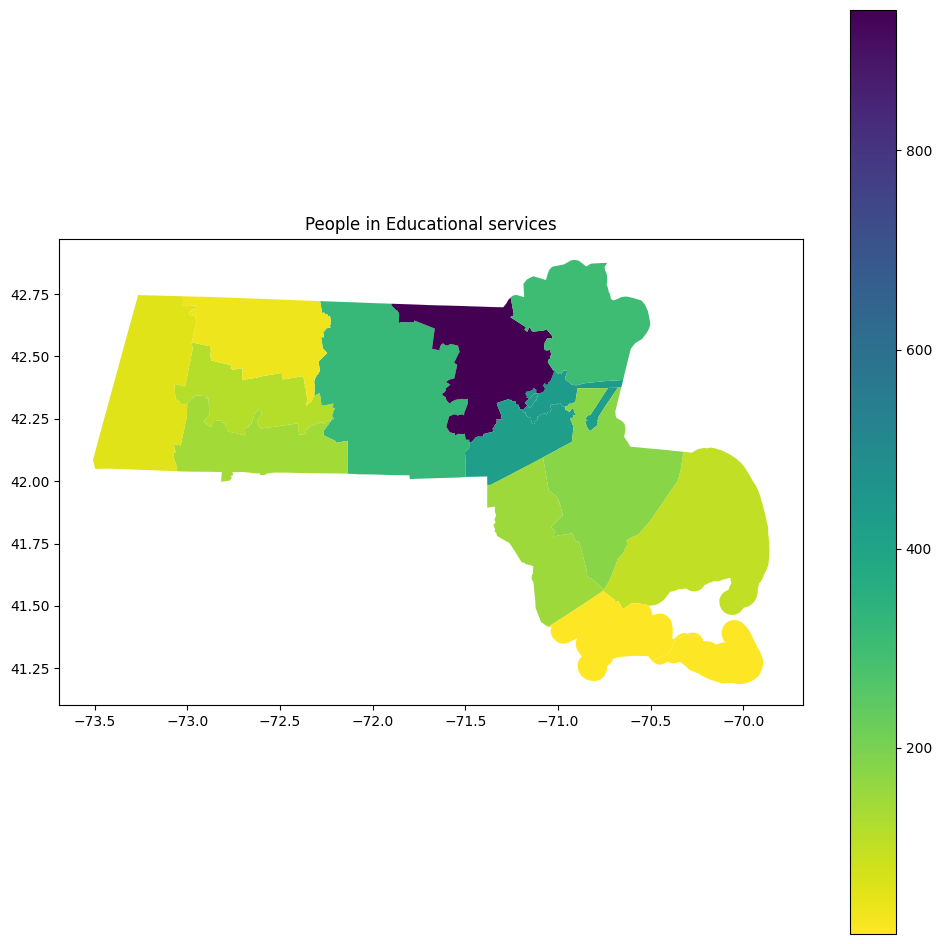

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
dgf_merged.plot(column='Number of establishments', ax=ax, linewidth=0.2,legend=True,cmap='viridis_r')
ax.set_title(f'People in {NACIS_Business_Name}')


# <font color=red>Challenge 1 </font>


- Step 1: Load MA_Population
- Step 2: Remove the row for the "All State" data, and only Keep the ones for the counties
- Step 3: Make a new DataFrame (df_MA_POP_ALL), with the  two cols:
    - "Geography"
    - "Estimate!!SEX AND AGE!!Total population"
    - "Percent!!SEX AND AGE!!Total population"
    - "Percent!!SEX AND AGE!!Under 5 years"
    - "Percent!!SEX AND AGE!!5 to 9 years"
    - "Percent!!SEX AND AGE!!10 to 14 years"
    - "Percent!!SEX AND AGE!!15 to 19 years"
    - "Percent!!SEX AND AGE!!20 to 24 years
    - "Percent!!SEX AND AGE!!25 to 34 years"
    - "Percent!!SEX AND AGE!!35 to 44 years"
    - "Percent!!SEX AND AGE!!45 to 54 years"
    - "Percent!!SEX AND AGE!!55 to 59 years"
    - "Percent!!SEX AND AGE!!60 to 64 years"
    - "Percent!!SEX AND AGE!!65 to 74 years"
    - "Percent!!SEX AND AGE!!75 to 84 years"
    - "Percent!!SEX AND AGE!!85 years and over"
    

- Step 4: make a new column with the name of "GEOID_" which is the formatted version of "GEO_ID" e.g. in GEO_ID: 0500000US25001 ==> GEOID_ : 25001

- Step 5: Merge df_MA_POP_ALL with gdf_MA
- Step 6: Make the Choropleth map of the state for the population


## <font color=red>Complete here (Step 1 and 2)</font>



In [ ]:
df_MA_POP = pd.read_csv("https://raw.githubusercontent.com/umassdgithub/Sample_Data/main/MA_Population.csv",skiprows=[0,2])

df_MA_POP.head()

,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Annotation of Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Annotation of Margin of Error!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total population,Annotation of Percent Margin of Error!!SEX AND AGE!!Total population,Annotation of Percent!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population!!Male,Annotation of Margin of Error!!SEX AND AGE!!Total population!!Male,Annotation of Estimate!!SEX AND AGE!!Total population!!Male,Percent!!SEX AND AGE!!Total population!!Male,Percent Margin of Error!!SEX AND AGE!!Total population!!Male,Annotation of Percent Margin of Error!!SEX AND AGE!!Total population!!Male,Annotation of Percent!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Annotation of Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population!!Female,Annotation of Margin of Error!!SEX AND AGE!!Total population!!Female,Percent!!SEX AND AGE!!Total population!!Female,Annotation of Percent!!SEX AND AGE!!Total population!!Female,Percent Margin of Error!!SEX AND AGE!!Total population!!Female,Annotation of Percent Margin of Error!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Margin of Error!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Annotation of Margin of Error!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Annotation of Estimate!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Percent!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Percent Margin of Error!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Annotation of Percent Margin of Error!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Annotation of Percent!!SEX AND AGE!!Total population!!Sex ratio (males per 100 females),Estimate!!SEX AND AGE!!Under 5 years,Margin of Error!!SEX AND AGE!!Under 5 years,Annotation of Margin of Error!!SEX AND AGE!!Under 5 years,Annotation of Estimate!!SEX AND AGE!!Under 5 years,Percent!!SEX AND AGE!!Under 5 years,Annotation of Percent!!SEX AND AGE!!Under 5 years,Percent Margin of Error!!SEX AND AGE!!Under 5 years,Annotation of Percent Margin of Error!!SEX AND AGE!!Under 5 years,Estimate!!SEX AND AGE!!5 to 9 years,Annotation of Estimate!!SEX AND AGE!!5 to 9 years,Margin of Error!!SEX AND AGE!!5 to 9 years,Annotation of Margin of Error!!SEX AND AGE!!5 to 9 years,Percent!!SEX AND AGE!!5 to 9 years,Percent Margin of Error!!SEX AND AGE!!5 to 9 years,Annotation of Percent Margin of Error!!SEX AND AGE!!5 to 9 years,Annotation of Percent!!SEX AND AGE!!5 to 9 years,Estimate!!SEX AND AGE!!10 to 14 years,Margin of Error!!SEX AND AGE!!10 to 14 years,Annotation of Margin of Error!!SEX AND AGE!!10 to 14 years,Annotation of Estimate!!SEX AND AGE!!10 to 14 years,Percent!!SEX AND AGE!!10 to 14 years,Percent Margin of Error!!SEX AND AGE!!10 to 14 years,Annotation of Percent Margin of Error!!SEX AND AGE!!10 to 14 years,Annotation of Percent!!SEX AND AGE!!10 to 14 years,Estimate!!SEX AND AGE!!15 to 19 years,Margin of Error!!SEX AND AGE!!15 to 19 years,Annotation of Margin of Error!!SEX AND AGE!!15 to 19 years,Annotation of Estimate!!SEX AND AGE!!15 to 19 years,Percent!!SEX AND AGE!!15 to 19 years,Annotation of Percent!!SEX AND AGE!!15 to 19 years,Percent Margin of Error!!SEX AND AGE!!15 to 19 years,Annotation of Percent Margin of Error!!SEX AND AGE!!15 to 19 years,Estimate!!SEX AND AGE!!20 to 24 years,Annotation of Estimate!!SEX AND AGE!!20 to 24 years,Margin of Error!!SEX AND AGE!!20 to 24 years,Annotation of Margin of Error!!SEX AND AGE!!20 to 24 years,Percent!!SEX AND AGE!!20 to 24 years,Percent Margin of Error!!SEX AND AGE!!20 to 24 years,Annotation of Percent Margin of Erro

## <font color=red>Complete here (Step 3)</font>
Filter the features and only preserve the following format of the table.

In [ ]:
selected_columns = [
    "Geography",
    "Estimate!!SEX AND AGE!!Total population",
    "Percent!!SEX AND AGE!!Total population",
    "Percent!!SEX AND AGE!!Under 5 years",
    "Percent!!SEX AND AGE!!5 to 9 years",
    "Percent!!SEX AND AGE!!10 to 14 years",
    "Percent!!SEX AND AGE!!15 to 19 years",
    "Percent!!SEX AND AGE!!20 to 24 years",
    "Percent!!SEX AND AGE!!25 to 34 years",
    "Percent!!SEX AND AGE!!35 to 44 years",
    "Percent!!SEX AND AGE!!45 to 54 years",
    "Percent!!SEX AND AGE!!55 to 59 years",
    "Percent!!SEX AND AGE!!60 to 64 years",
    "Percent!!SEX AND AGE!!65 to 74 years",
    "Percent!!SEX AND AGE!!75 to 84 years",
    "Percent!!SEX AND AGE!!85 years and over"
]

df_MA_POP_ALL = df_MA_POP[selected_columns]

df_MA_POP_ALL.head()

,Geography,Estimate!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Under 5 years,Percent!!SEX AND AGE!!5 to 9 years,Percent!!SEX AND AGE!!10 to 14 years,Percent!!SEX AND AGE!!15 to 19 years,Percent!!SEX AND AGE!!20 to 24 years,Percent!!SEX AND AGE!!25 to 34 years,Percent!!SEX AND AGE!!35 to 44 years,Percent!!SEX AND AGE!!45 to 54 years,Percent!!SEX AND AGE!!55 to 59 years,Percent!!SEX AND AGE!!60 to 64 years,Percent!!SEX AND AGE!!65 to 74 years,Percent!!SEX AND AGE!!75 to 84 years,Percent!!SEX AND AGE!!85 years and over
0,0500000US25001,213444,213444,3.6,4.0,4.6,5.2,5.0,8.8,8.4,13.1,7.7,9.8,16.8,8.4,4.6
1,0500000US25003,126313,126313,3.8,4.4,5.2,6.6,6.7,10.9,10.1,13.7,8.5,7.5,12.8,6.9,3.0
2,0500000US25005,561483,561483,5.2,5.4,6.3,6.4,6.5,12.7,12.3,14.6,7.2,6.6,9.5,4.8,2.4
3,0500000US25009,785205,785205,5.6,5.7,6.3,6.6,6.6,12.3,11.9,14.2,7.5,6.7,9.6,4.5,2.6
4,0500000US25011,70702,70702,4.6,4.2,5.7,5.5,5.2,11.2,11.6,13.5,8.9,8.4,13.4,5.9,1.9


## <font color=red>Complete here (Step 4)</font>
The objective is to produce a KEY column that can be used to join (merge) the two tables.

In [ ]:
# Step 4
df_MA_POP_ALL['GEOID_'] = df_MA_POP_ALL['Geography'].apply(lambda x: x.split("US")[1])


In [ ]:
df_MA_POP_ALL.head()

,Geography,Estimate!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Under 5 years,Percent!!SEX AND AGE!!5 to 9 years,Percent!!SEX AND AGE!!10 to 14 years,Percent!!SEX AND AGE!!15 to 19 years,Percent!!SEX AND AGE!!20 to 24 years,Percent!!SEX AND AGE!!25 to 34 years,Percent!!SEX AND AGE!!35 to 44 years,Percent!!SEX AND AGE!!45 to 54 years,Percent!!SEX AND AGE!!55 to 59 years,Percent!!SEX AND AGE!!60 to 64 years,Percent!!SEX AND AGE!!65 to 74 years,Percent!!SEX AND AGE!!75 to 84 years,Percent!!SEX AND AGE!!85 years and over,GEOID_
0,0500000US25001,213444,213444,3.6,4.0,4.6,5.2,5.0,8.8,8.4,13.1,7.7,9.8,16.8,8.4,4.6,25001
1,0500000US25003,126313,126313,3.8,4.4,5.2,6.6,6.7,10.9,10.1,13.7,8.5,7.5,12.8,6.9,3.0,25003
2,0500000US25005,561483,561483,5.2,5.4,6.3,6.4,6.5,12.7,12.3,14.6,7.2,6.6,9.5,4.8,2.4,25005
3,0500000US25009,785205,785205,5.6,5.7,6.3,6.6,6.6,12.3,11.9,14.2,7.5,6.7,9.6,4.5,2.6,25009
4,0500000US25011,70702,70702,4.6,4.2,5.7,5.5,5.2,11.2,11.6,13.5,8.9,8.4,13.4,5.9,1.9,25011


## <font color=red>Complete here (Step 5)</font>
Now that the KEYs are generated we can

In [ ]:
# Step 5:
# dgf_POP_merged = df_MA_POP_ALL.merge(gdf_MA, on='GEOID_')
dgf_POP_merged = gdf_MA.merge(df_MA_POP_ALL, left_on='GEOID', right_on='GEOID_', how='inner').copy()

dgf_POP_merged

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Estimate!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Total population,Percent!!SEX AND AGE!!Under 5 years,Percent!!SEX AND AGE!!5 to 9 years,Percent!!SEX AND AGE!!10 to 14 years,Percent!!SEX AND AGE!!15 to 19 years,Percent!!SEX AND AGE!!20 to 24 years,Percent!!SEX AND AGE!!25 to 34 years,Percent!!SEX AND AGE!!35 to 44 years,Percent!!SEX AND AGE!!45 to 54 years,Percent!!SEX AND AGE!!55 to 59 years,Percent!!SEX AND AGE!!60 to 64 years,Percent!!SEX AND AGE!!65 to 74 years,Percent!!SEX AND AGE!!75 to 84 years,Percent!!SEX AND AGE!!85 years and over,GEOID_
0,25,015,00606934,25015,Hampshire,Hampshire County,06,H4,G4020,NaN,NaN,NaN,N,1365533874,46625893,+42.3394593,-072.6636936,"POLYGON ((-72.33597 42.22016, -72.33602 42.219...",0500000US25015,161834,161834,3.7,3.5,4.6,11.7,15.0,10.7,10.1,11.1,6.3,6.8,10.0,4.3,2.2,25015
1,25,025,00606939,25025,Suffolk,Suffolk County,06,H4,G4020,NaN,NaN,NaN,N,150875412,160499085,+42.3385513,-071.0182530,"POLYGON ((-71.03301 42.41461, -71.03282 42.415...",0500000US25025,797939,797939,5.3,4.6,4.2,7.0,9.5,23.2,13.0,11.2,5.5,4.9,6.7,3.6,1.4,25025
2,25,001,00606927,25001,Barnstable,Barnstable County,06,H1,G4020,NaN,NaN,NaN,A,1020973580,2360362409,+41.7061233,-070.1648227,"POLYGON ((-70.69096 41.66046, -70.68832 41.665...",0500000US25001,213444,213444,3.6,4.0,4.6,5.2,5.0,8.8,8.4,13.1,7.7,9.8,16.8,8.4,4.6,25001
3,25,027,00606940,25027,Worcester,Worcester County,06,H4,G4020,NaN,NaN,NaN,N,3912614264,177372507,+42.3116934,-071.9402820,"POLYGON ((-71.98143 42.71323, -71.98057 42.713...",0500000US25027,826116,826116,5.4,5.7,6.2,6.9,6.8,12.8,12.0,14.7,7.5,6.7,9.0,4.0,2.3,25027
4,25,013,00606933,25013,Hampden,Hampden County,06,H4,G4020,NaN,NaN,NaN,N,1598035087,44416923,+42.1361975,-072.6356476,"POLYGON ((-72.60798 42.03108, -72.60854 42.031...",0500000US25013,469818,469818,5.5,5.7,6.5,7.1,7.4,13.1,11.6,12.9,7.3,6.3,9.4,4.7,2.4,25013
5,25,003,00606928,25003,Berkshire,Berkshire County,06,H4,G4020,NaN,NaN,NaN,N,2400592147,50709767,+42.3714930,-073.2179276,"POLYGON ((-73.16364 42.74394, -73.16357 42.743...",0500000US25003,126313,126313,3.8,4.4,5.2,6.6,6.7,10.9,10.1,13.7,8.5,7.5,12.8,6.9,3.0,25003
6,25,005,00606929,25005,Bristol,Bristol County,06,H1,G4020,NaN,NaN,NaN,A,1432549560,357457333,+41.7485884,-071.0888940,"POLYGON ((-70.85821 41.68117, -70.85819 41.681...",0500000US25005,561483,561483,5.2,5.4,6.3,6.4,6.5,12.7,12.3,14.6,7.2,6.6,9.5,4.8,2.4,25005
7,25,017,00606935,25017,Middlesex,Middlesex County,06,H4,G4020,NaN,NaN,NaN,N,2118264215,75317586,+42.4817182,-071.3949161,"POLYGON ((-71.32733 42.31375, -71.32756 42.313...",0500000US25017,1602947,1602947,5.4,5.3,5.7,6.4,7.1,15.3,13.0,13.9,6.9,6.1,8.5,4.3,2.2,25017
8,25,009,00606931,25009,Essex,Essex County,06,H4,G4020,NaN,NaN,NaN,N,1275605370,870172676,+42.6427082,-070.8649085,"POLYGON ((-70.85144 42.39321, -70.87433 42.389...",0500000US25009,785205,785205,5.6,5.7,6.3,6.6,6.6,12.3,11.9,14.2,7.5,6.7,9.6,4.5,2.6,25009
9,25,021,00606937,25021,Norfolk,Norfolk County,06,H1,G4020,NaN,NaN,NaN,A,1025902910,124957102,+42.1717377,-071.1811102,"MULTIPOLYGON (((-70.93769 42.27750, -70.92549 ...",0500000US25021,700322,700322,5.4,5.7,6.1,6.4,6.3,12.5,12.8,14.4,7.3,6.6,9.2,4.9,2.5,25021


<Axes: >

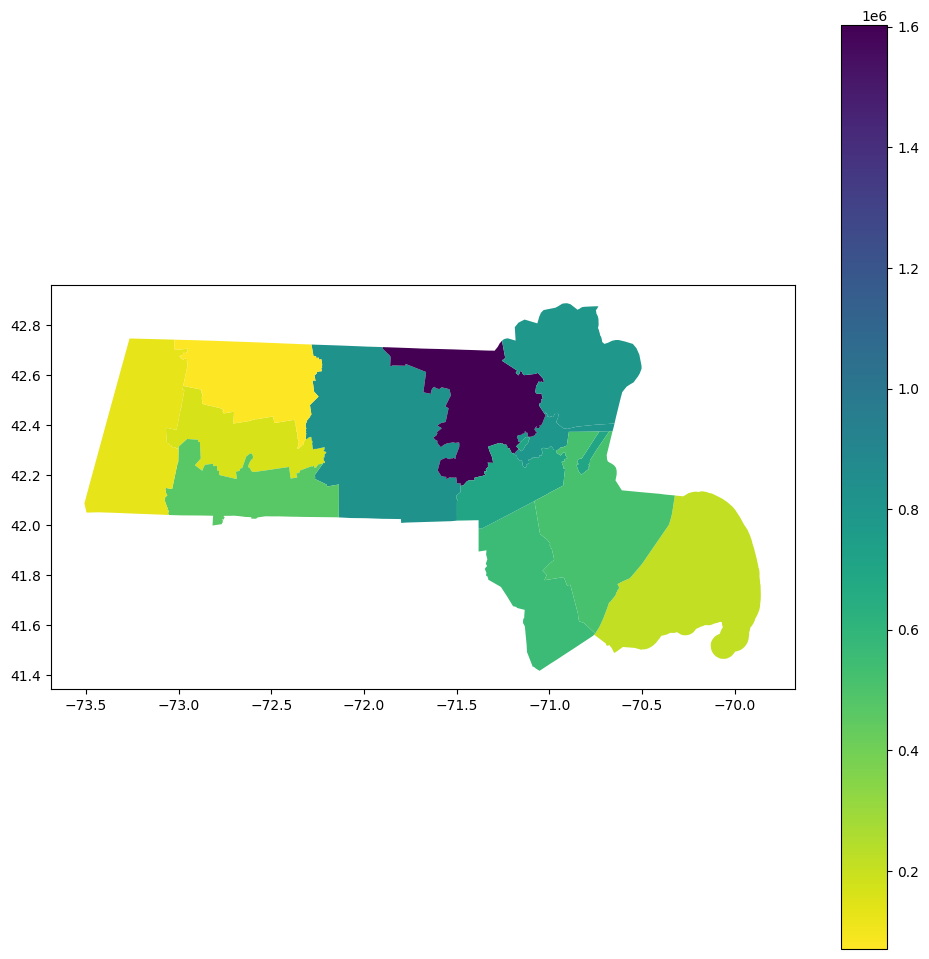

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
dgf_POP_merged.plot(column='Estimate!!SEX AND AGE!!Total population', ax=ax, linewidth=0.2,legend=True,cmap='viridis_r')


# <font color=red>Challenge 2 </font>

- Step 1: Export data in the form of GeoJSON

<img src="https://github.com/umassdgithub/Sample_Data/blob/main/img/download_from_Colab.png?raw=true" width=50%>


In [ ]:
# Convert the merged DataFrame to a GeoDataFrame
gdf_POP_merged_ = gpd.GeoDataFrame(dgf_POP_merged)

# Define the output GeoJSON file path
output_geojson_file = 'gdf_POP_merged_.geojson'

# Save the GeoDataFrame to a GeoJSON file
gdf_POP_merged_.to_file(output_geojson_file, driver='GeoJSON')

- Step 2: Use <a href=https://kepler.gl/> KeplerGL</a> (https://kepler.gl/) to Generate Visualization below for percentage of population below 5 years old
<img src="https://github.com/umassdgithub/Sample_Data/blob/main/img/example.png?raw=true" width=50%>